A notebook for configuring the cameras of each channel of the Kameda Lab Orochi Simulator.

In [60]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

# Overview

This notebook guides the user through connection to each of the channels of the OROCHI simulator, and gives prompts for recording the channel number, the centre-wavelength, full-width-at-half-maximum, f-number, and region-of-interest of sample area, associated with each channel camera system, indexed by serial number.

First we write a look-up-table of camera properties, and then we will attach the serial number of the associated camera to the camera properties.

The steps are:
1. Get list of serial numbers of devices connected.
For each device:
2. Begin live feed
3. Establish position of camera in rig (manual)
4. Prompt user to enter camera number
5. Assign serial number to camera number
6. Write look-up-table of properties of camera number, and add serial number
7. Automatically set region of interest
8. Check region of interest
9. Write region of interest to properties

# Camera Properties

There are 8 OROCHI channels, labelled 1 - 8, with band 8 as the monochromatic band.

| Band | CWL (nm) | FWHM (nm) | f# |
|------|----------|-----------|----|
| 1    | 400      | 50        |6.4 |
| 2    | 475      | 25        |6.4 |
| 3    | 550      | 25        |6.4 |
| 4    | 650      | 50        |6.4 |
| 5    | 725      | 50        |6.4 |
| 6    | 850      | 50        |6.2 |
| 7    | 950      | 50        |5.8 |
| 8    | 550      | 250       |6.4 |

These f-numbers are for the equivalent OROCHI FM channels, from the Kameda et al 2021 paper. I need to verify that the same are used for the simulator.
Note that these values are not currently used in the processing, but recorded in the metadata for future reference.

We store this information in a dictionary of dictionaries, labelled by band name, but we will replace these labels with the device name of each camera.

In [61]:
cameras = {
        'DMK 33GX249 10910294':
             {'number': 3,
              'serial': 10910294,
              'fnumber': 4.4, # updated to bring target exposure below 450 ms. 6.4 for OROCHI
              'position': 1,
              'flength': 12.5E-3,
              'cwl': 400.0,
              'fwhm': 50.0,
              'width': 1920,
              'height': 1200,
              'roix': 0,
              'roiy': 0,
              'roiw': 1920,
              'roih': 1200
              },
        'DMK 33GX249 10910273':
             {'number': 1,
              'serial': 10910273,
              'position': 2,
              'fnumber': 6.4,
              'flength': 12.5E-3,
              'cwl': 475.0,
              'fwhm': 25.0,
              'width': 1920,
              'height': 1200,
              'roix': 0,
              'roiy': 0,
              'roiw': 1920,
              'roih': 1200
              },
        'DMK 33GX249 10910289':
             {'number': 2,
              'serial': 10910289,
              'position': 3,
              'fnumber': 6.4,
              'flength': 12.5E-3,
              'cwl': 550.0,
              'fwhm': 25.0,
              'width': 1920,
              'height': 1200,
              'roix': 0,
              'roiy': 0,
              'roiw': 1920,
              'roih': 1200
              },  
        'DMK 33GX249 10910288':
             {'number': 0,
              'serial': 10910288,
              'position': 4,
              'fnumber': 6.4,
              'flength': 12.5E-3,
              'cwl': 650.0,
              'fwhm': 50.0,
              'width': 1920,
              'height': 1200,
              'roix': 0,
              'roiy': 0,
              'roiw': 1920,
              'roih': 1200
              },    
        'DMK 33GX249 10910291':
             {'number': 4,
              'serial': 10910291,
              'position': 5,
              'fnumber': 6.4,
              'flength': 12.5E-3,
              'cwl': 725.0,
              'fwhm': 50.0,
              'width': 1920,
              'height': 1200,
              'roix': 0,
              'roiy': 0,
              'roiw': 1920,
              'roih': 1200
              },  
        'DMK 33GX249 10910265':
             {'number': 6,
              'serial': 10910265,
              'position': 6,
              'fnumber': 6.4,
              'flength': 12.5E-3,
              'cwl': 550.0,
              'fwhm': 25.0,
              'width': 1920,
              'height': 1200,
              'roix': 0,
              'roiy': 0,
              'roiw': 1920,
              'roih': 1200
              }, 
        'DMK 33GX249 23120778':
             {'number': 7,
              'serial': 23120778,
              'position': 7,
              'fnumber': 4.1, # updated to bring target exposure below 450 ms. 5.8 for OROCHI
              'flength': 12.5E-3,
              'cwl': 950.0,
              'fwhm': 50.0,
              'width': 1920,
              'height': 1200,
              'roix': 0,
              'roiy': 0,
              'roiw': 1920,
              'roih': 1200
              },
        'DMK 33GX249 10910295':
             {'number': 5,
              'serial': 10910295,
              'position': 8,
              'fnumber': 6.2,
              'flength': 12.5E-3,
              'cwl': 850.0,
              'fwhm': 50.0,
              'width': 1920,
              'height': 1200,
              'roix': 0,
              'roiy': 0,
              'roiw': 1920,
              'roih': 1200
              }, 
       }


# Getting the list of available cameras

Here we connect to the available cameras, and get a list of their names.

In [62]:
import orochi_sim_ctrl as osc

ic = osc.start_ic()
connected_cameras = osc.connect_cameras(ic, cameras)
osc.configure_cameras(connected_cameras)

Device 0 (DMK 33GX249 10910288) succesfully connected.
Device 1 (DMK 33GX249 10910273) succesfully connected.
Device 2 (DMK 33GX249 10910289) succesfully connected.
Device 3 (DMK 33GX249 10910294) succesfully connected.
Device 4 (DMK 33GX249 10910291) succesfully connected.
Device 5 (DMK 33GX249 10910295) succesfully connected.
Device 7 (DMK 33GX249 23120778) succesfully connected.
Device 6 (DMK 33GX249 10910265) succesfully connected.
-----------------------------------
Device 0 (DMK 33GX249 10910288)
-----------------------------------
1
Video Format set to : Y16 (1920x1200)
1
Sink Format set to : "SinkFormats.Y16"
Frame Rate set to : 30.0 FPS
Brightness Value set to 8
Contrast Value set to 0
Sharpness Value set to 0
Gamma Value set to 100
Gain Value set to 4.269999980926514
Gain Auto set to 0
Exposure Value set to 0.009999999776482582
Exposure Auto set to 1
Exposure Auto Reference set to 80
Exposure Auto Max Value set to 10.0
Exposure Auto Max Auto set to 0
Trigger Enable set to 0
D

# Setting Region of Interest

The sample typically occupies only a small portion of the image, so it is useful to record this region of interest for future use.

We can do this by simply finding the brightest pixel after blurring, and centering a 128 x 128 window around this.

-----------------------------------
Device 0 (DMK 33GX249 10910288)
-----------------------------------
Initiating search:
Exposure Auto set to 0
Exposure Value set to 0.0020000000949949026
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 1722.0, Target: 3275.2000000000003
Exposure current Value: 0.0020000000949949026
Exposure Value set to 0.0038039491046220064
Exposure set to 0.0038030000869184732 (err of 9.489903912279773e-07
Trial 1:
Imaging with Exposure: 0.0038030000869184732 s
+Good exposure 0.0038030000869184732 Image recieved
Quantile: 3225.0, Target: 3275.2000000000003
Exposure current Value: 0.0038030000869184732
Exposure Value set to 0.0038621972780674696
Exposure set to 0.0038620000705122948 (err of 1.9710303045998925e-07
Trial 2:
Imaging with Exposure: 0.0038620000705122948 s
+Good exposure 0.0038620000705122948 Image recieved
Quantile: 3286.0, Target: 3275.2000000000003
Exposure current Value: 0.00386200

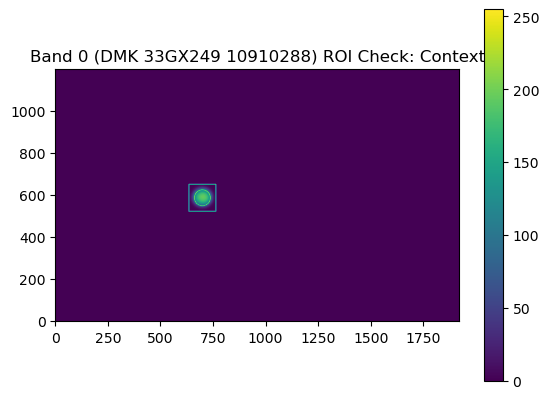

Imaging with Exposure: 0.0038610000628978014 s
+Good exposure 0.0038610000628978014 Image recieved


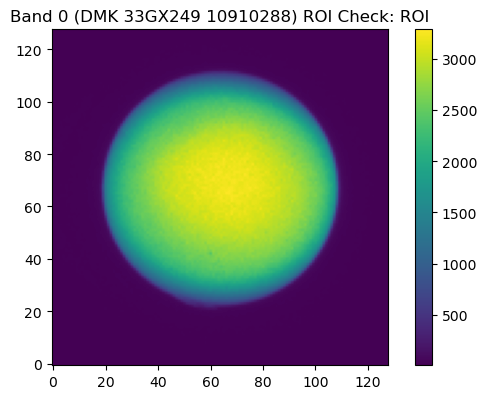

-----------------------------------
-----------------------------------
Device 1 (DMK 33GX249 10910273)
-----------------------------------
Initiating search:
Exposure Auto set to 0
Exposure Value set to 0.0020000000949949026
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 1172.0, Target: 3275.2000000000003
Exposure current Value: 0.0020000000949949026
Exposure Value set to 0.005589078646153212
Exposure set to 0.005588999949395657 (err of 7.881436484263177e-08
Trial 1:
Imaging with Exposure: 0.005588999949395657 s
+Good exposure 0.005588999949395657 Image recieved
Quantile: 3211.0, Target: 3275.2000000000003
Exposure current Value: 0.005588999949395657
Exposure Value set to 0.005700745154172182
Exposure set to 0.00570000009611249 (err of 7.450406862199305e-07
Trial 2:
Imaging with Exposure: 0.00570000009611249 s
+Good exposure 0.00570000009611249 Image recieved
Quantile: 3267.0, Target: 3275.2000000000003
Exposure cu

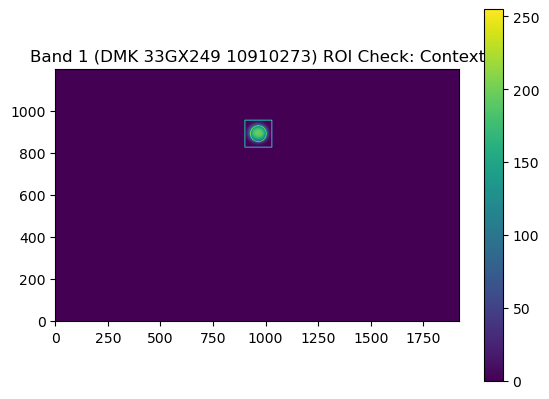

Imaging with Exposure: 0.005714000202715397 s
+Good exposure 0.005714000202715397 Image recieved


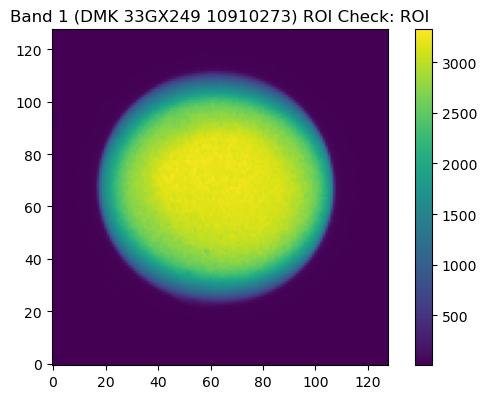

-----------------------------------
-----------------------------------
Device 2 (DMK 33GX249 10910289)
-----------------------------------
Initiating search:
Exposure Auto set to 0
Exposure Value set to 0.0020000000949949026
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 3587.0, Target: 3275.2000000000003
Exposure current Value: 0.0020000000949949026
Exposure Value set to 0.0018261501099914312
Exposure set to 0.0018260000506415963 (err of 1.500221566491048e-07
Trial 1:
Imaging with Exposure: 0.0018260000506415963 s
+Good exposure 0.0018260000506415963 Image recieved
Quantile: 3252.0, Target: 3275.2000000000003
Exposure current Value: 0.0018260000506415963
Exposure Value set to 0.0018390268087387085
Exposure set to 0.0018390000332146883 (err of 2.683205633157923e-08
Trial 2:
Imaging with Exposure: 0.0018390000332146883 s
+Good exposure 0.0018390000332146883 Image recieved
Quantile: 3302.0, Target: 3275.2000000000003

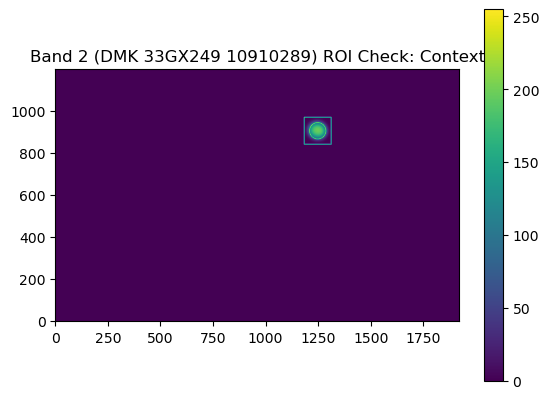

Imaging with Exposure: 0.0018370000179857016 s
+Good exposure 0.0018370000179857016 Image recieved


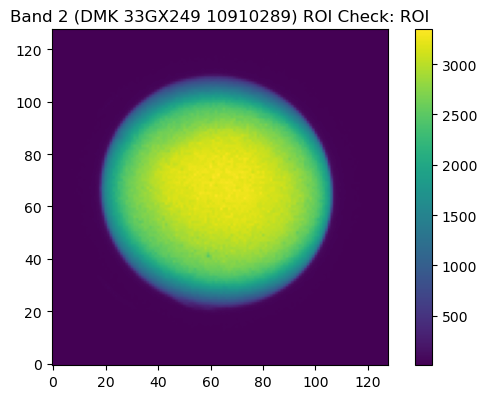

-----------------------------------
-----------------------------------
Device 3 (DMK 33GX249 10910294)
-----------------------------------
Initiating search:
Exposure Auto set to 0
Exposure Value set to 0.0020000000949949026
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 409.0, Target: 3275.2000000000003
Exposure current Value: 0.0020000000949949026
Exposure Value set to 0.08007824420928955
Exposure set to 0.08007799834012985 (err of 2.4507218439329126e-07
Trial 1:
Imaging with Exposure: 0.08007799834012985 s
+Good exposure 0.08007799834012985 Image recieved
Quantile: 4094.0, Target: 3275.2000000000003
Exposure current Value: 0.08007799834012985
Exposure Value set to 0.01281247939914465
Exposure set to 0.012811999768018723 (err of 4.799664020532779e-07
Trial 2:
Imaging with Exposure: 0.012811999768018723 s
+Good exposure 0.012811999768018723 Image recieved
Quantile: 2509.0, Target: 3275.2000000000003
Exposure curre

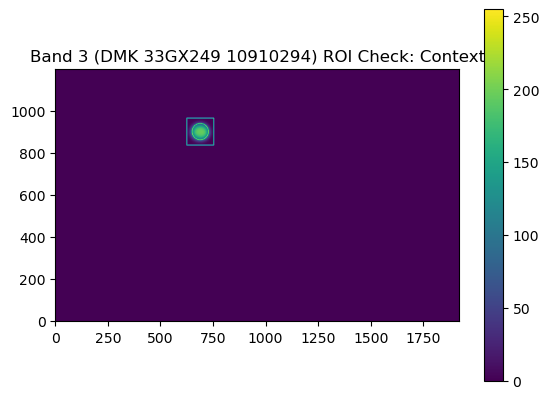

Imaging with Exposure: 0.016829000785946846 s
+Good exposure 0.016829000785946846 Image recieved


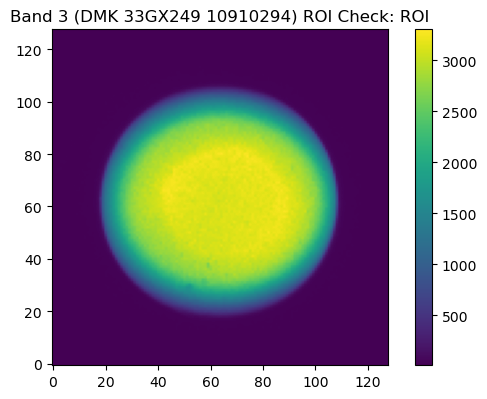

-----------------------------------
-----------------------------------
Device 4 (DMK 33GX249 10910291)
-----------------------------------
Initiating search:
Exposure Auto set to 0
Exposure Value set to 0.0020000000949949026
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 1877.0, Target: 3275.2000000000003
Exposure current Value: 0.0020000000949949026
Exposure Value set to 0.0034898242447525263
Exposure set to 0.0034890000242739916 (err of 8.243290170609555e-07
Trial 1:
Imaging with Exposure: 0.0034890000242739916 s
+Good exposure 0.0034890000242739916 Image recieved
Quantile: 3245.0, Target: 3275.2000000000003
Exposure current Value: 0.0034890000242739916
Exposure Value set to 0.003521470818668604
Exposure set to 0.0035210000351071358 (err of 4.708060337508396e-07
Trial 2:
Imaging with Exposure: 0.0035210000351071358 s
+Good exposure 0.0035210000351071358 Image recieved
Quantile: 3259.0, Target: 3275.2000000000003


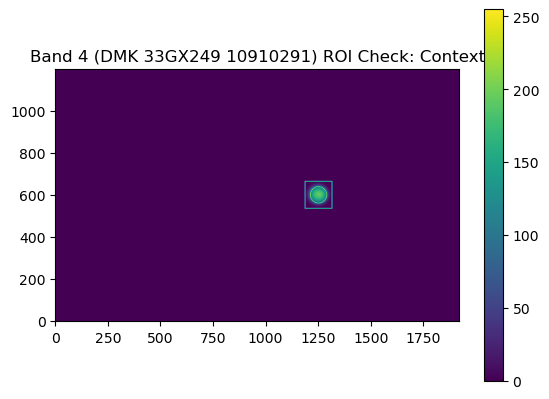

Imaging with Exposure: 0.0035510000307112932 s
+Good exposure 0.0035510000307112932 Image recieved


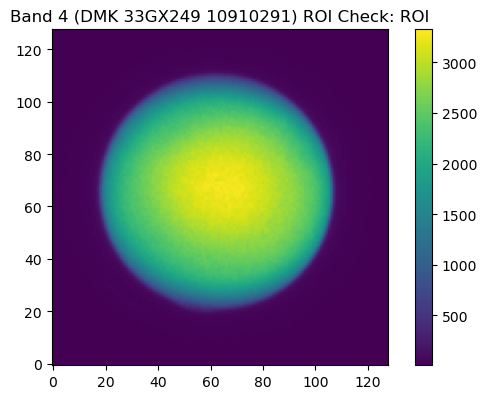

-----------------------------------
-----------------------------------
Device 5 (DMK 33GX249 10910295)
-----------------------------------
Initiating search:
Exposure Auto set to 0
Exposure Value set to 0.0020000000949949026
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 716.0, Target: 3275.2000000000003
Exposure current Value: 0.0020000000949949026
Exposure Value set to 0.009148604236543179
Exposure set to 0.009147999808192253 (err of 6.0397829839548e-07
Trial 1:
Imaging with Exposure: 0.009147999808192253 s
+Good exposure 0.009147999808192253 Image recieved
Quantile: 3157.0, Target: 3275.2000000000003
Exposure current Value: 0.009147999808192253
Exposure Value set to 0.00949050672352314
Exposure set to 0.00949000008404255 (err of 5.064005286475187e-07
Trial 2:
Imaging with Exposure: 0.00949000008404255 s
+Good exposure 0.00949000008404255 Image recieved
Quantile: 3285.0, Target: 3275.2000000000003
Exposure curren

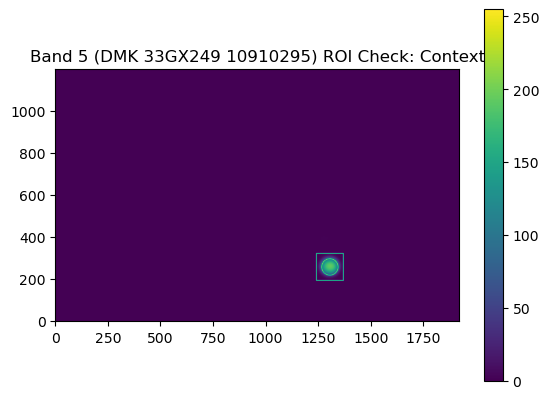

Imaging with Exposure: 0.009457999840378761 s
+Good exposure 0.009457999840378761 Image recieved


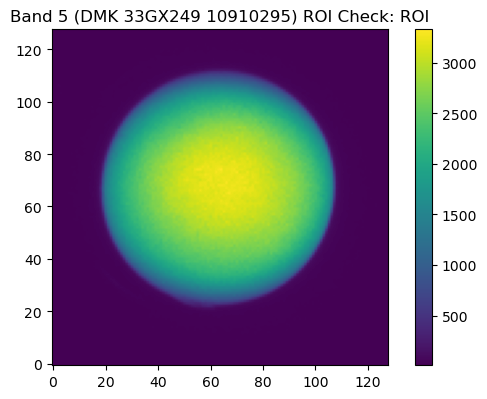

-----------------------------------
-----------------------------------
Device 7 (DMK 33GX249 23120778)
-----------------------------------
Initiating search:
Exposure Auto set to 0
Exposure Value set to 0.0020000000949949026
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 352.0, Target: 3275.2000000000003
Exposure current Value: 0.0020000000949949026
Exposure Value set to 0.09304545819759369
Exposure set to 0.09304500371217728 (err of 4.552526992190886e-07
Trial 1:
Imaging with Exposure: 0.09304500371217728 s
+Good exposure 0.09304500371217728 Image recieved
Quantile: 4094.0, Target: 3275.2000000000003
Exposure current Value: 0.09304500371217728
Exposure Value set to 0.01488720066845417
Exposure set to 0.014887000434100628 (err of 2.0015984773628925e-07
Trial 2:
Imaging with Exposure: 0.014887000434100628 s
+Good exposure 0.014887000434100628 Image recieved
Quantile: 2500.0, Target: 3275.2000000000003
Exposure curre

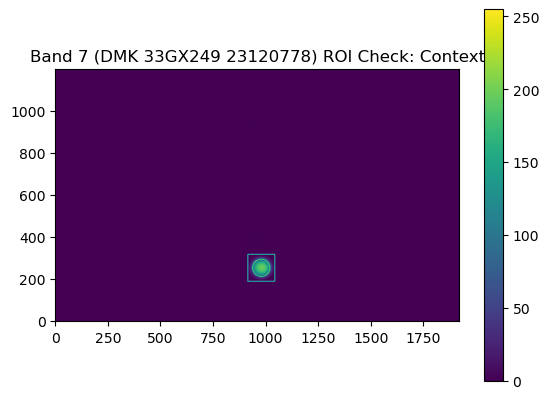

Imaging with Exposure: 0.0196359995752573 s
+Good exposure 0.0196359995752573 Image recieved


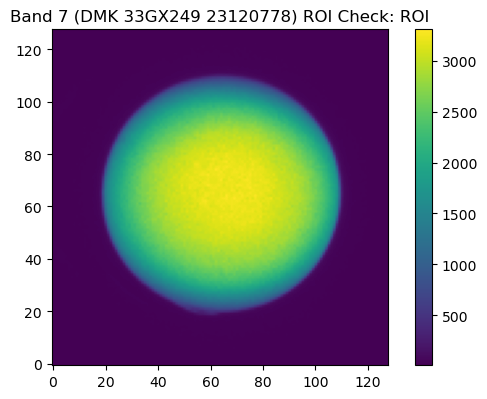

-----------------------------------
-----------------------------------
Device 6 (DMK 33GX249 10910265)
-----------------------------------
Initiating search:
Exposure Auto set to 0
Exposure Value set to 0.0020000000949949026
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 3894.0, Target: 3275.2000000000003
Exposure current Value: 0.0020000000949949026
Exposure Value set to 0.0016821777680888772
Exposure set to 0.0016820000018924475 (err of 1.77787303059845e-07
Trial 1:
Imaging with Exposure: 0.0016820000018924475 s
+Good exposure 0.0016820000018924475 Image recieved
Quantile: 3270.0, Target: 3275.2000000000003
Exposure current Value: 0.0016820000018924475
Exposure Value set to 0.0016846747603267431
Exposure set to 0.0016840000171214342 (err of 6.74724835184699e-07
Trial 2:
Imaging with Exposure: 0.0016840000171214342 s
+Good exposure 0.0016840000171214342 Image recieved
Quantile: 3281.0, Target: 3275.2000000000003
E

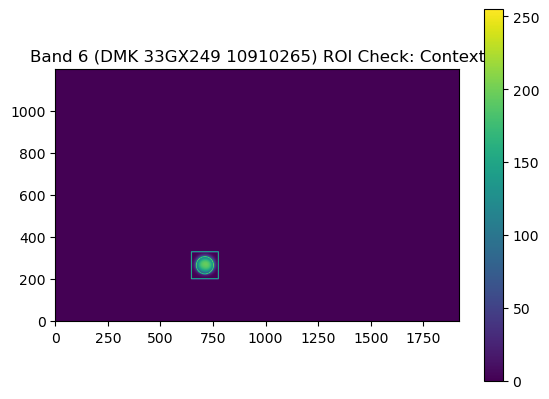

Imaging with Exposure: 0.0016710000345483422 s
+Good exposure 0.0016710000345483422 Image recieved


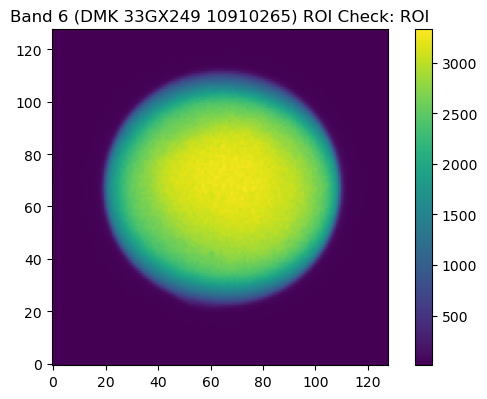

-----------------------------------


In [63]:
cameras = osc.find_camera_rois(connected_cameras, roi_size=128)

# Setting the F-Number

To set our cameras for the given f-numbers, we need to:
- set the lens ring f-number to the minimum of f/1.4
- establish all camera have same throughput at f/1.4
- get the exposure required to image the reflectance target to a given exposure (approx. 3700 DN) with high precision
- compute the exposure required to achieve the same level for the target f-number
- repeatedly adjust the ring until the value has been met.

-----------------------------------
Device 3
-----------------------------------
Initiating search:
Exposure Auto set to 0
Exposure Value set to 0.0020000000949949026
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 4094.0, Target: 3275.2000000000003
Exposure current Value: 0.0020000000949949026
Exposure Value set to 0.0003200000210199505
Exposure set to 0.00031999999191612005 (err of 2.3283064387071006e-11
Trial 1:
Imaging with Exposure: 0.00031999999191612005 s
+Good exposure 0.00031999999191612005 Image recieved
Quantile: 897.0, Target: 3275.2000000000003
Exposure current Value: 0.00031999999191612005
Exposure Value set to 0.0011684101773425937
Exposure set to 0.0011680000461637974 (err of 4.101807299333564e-07
Trial 2:
Imaging with Exposure: 0.0011680000461637974 s
+Good exposure 0.0011680000461637974 Image recieved
Quantile: 3301.0, Target: 3275.2000000000003
Exposure current Value: 0.0011680000461637974
Exposure

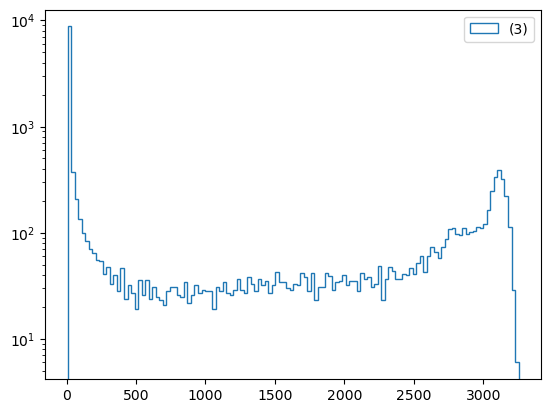

In [64]:
osc.check_f_numbers([connected_cameras[3]])

In [65]:
osc.set_f_numbers([connected_cameras[3],connected_cameras[6]])

-----------------------------------
Device 3
-----------------------------------
Initiating search:
Exposure Auto set to 0
Exposure Value set to 0.0020000000949949026
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 4094.0, Target: 3275.2000000000003
Exposure current Value: 0.0020000000949949026
Exposure Value set to 0.0003200000210199505
Exposure set to 0.00031999999191612005 (err of 2.3283064387071006e-11
Trial 1:
Imaging with Exposure: 0.00031999999191612005 s
+Good exposure 0.00031999999191612005 Image recieved
Quantile: 895.0, Target: 3275.2000000000003
Exposure current Value: 0.00031999999191612005
Exposure Value set to 0.00117102125659585
Exposure set to 0.0011709999525919557 (err of 2.12468758392214e-08
Trial 2:
Imaging with Exposure: 0.0011709999525919557 s
+Good exposure 0.0011709999525919557 Image recieved
Quantile: 3292.0, Target: 3275.2000000000003
Exposure current Value: 0.0011709999525919557
Exposure Va

KeyboardInterrupt: 

# Set Focus

In [23]:
osc.set_focus(connected_cameras)

-----------------------------------
Device 0
-----------------------------------
-----------------------------------
-----------------------------------
Device 1
-----------------------------------
-----------------------------------
-----------------------------------
Device 2
-----------------------------------
-----------------------------------
-----------------------------------
Device 3
-----------------------------------
-----------------------------------
-----------------------------------
Device 4
-----------------------------------
-----------------------------------
-----------------------------------
Device 5
-----------------------------------
-----------------------------------
-----------------------------------
Device 7
-----------------------------------
-----------------------------------
